# Adaboost Hyperparameter

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [2]:
np.random.seed(42)
X,y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
# X_train,X_test,y_train,y_test = train_test_split(X,y, state_size=0.2)

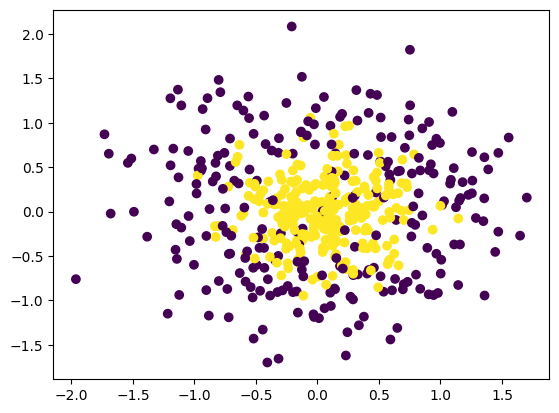

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()
np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10))

np.float64(0.812)

In [6]:
abc.fit(X,y)

,estimator,None
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None


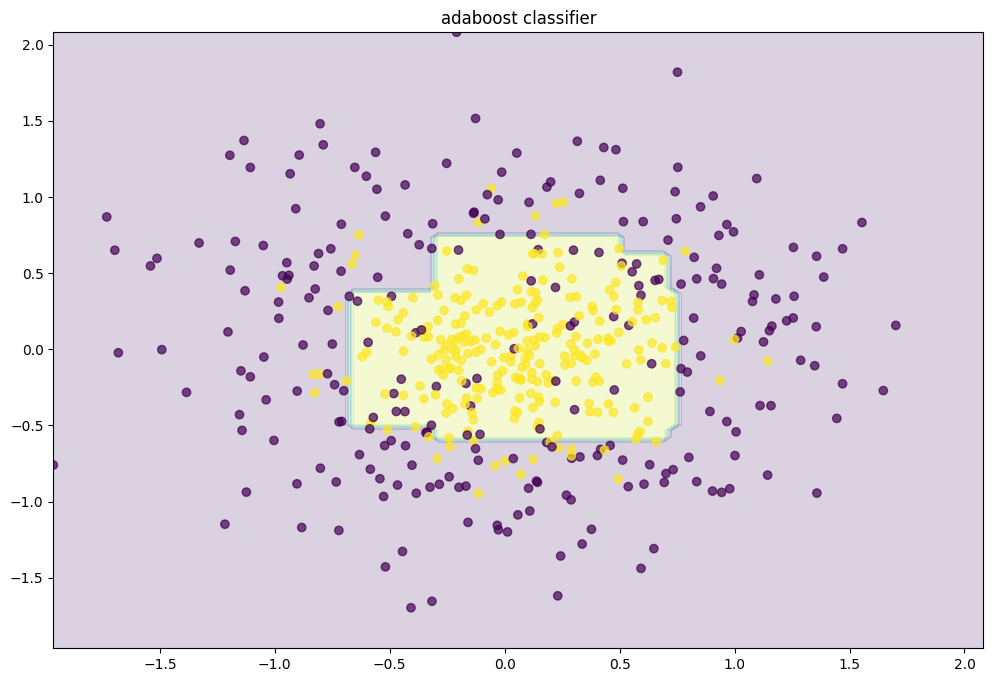

In [7]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis',alpha=.7)
    plt.title("adaboost classifier")
    plt.show()

plot_decision_boundary(abc)    

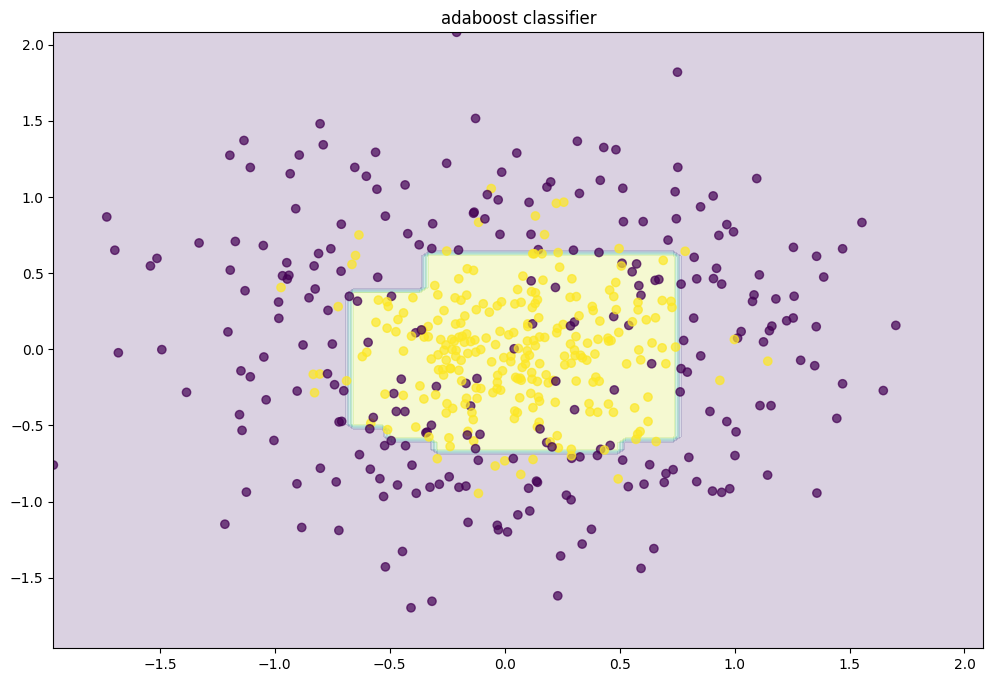

In [11]:
# working in estimators(hyperparameters)
# using learing rate overfitting se bach sakte ho 


abc = AdaBoostClassifier(n_estimators=1000,learning_rate=0.1)
abc.fit(X,y)
plot_decision_boundary(abc)

# Grid SearchCV Apply

In [13]:
from sklearn.model_selection import GridSearchCV
# 4️⃣ Define parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [14]:
# 5️⃣ Create AdaBoost classifier
abc = AdaBoostClassifier(random_state=42)

In [16]:
# 6️⃣ Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=abc,
    param_grid=param_grid,
    cv=5,            # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1)

In [1]:
 # 7️⃣ Fit the grid search
grid_search.fit(X_train, y_train)


NameError: name 'grid_search' is not defined

In [19]:
# 8️⃣ Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'